# Color Threshold, Green Screen

### Import resources

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [3]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


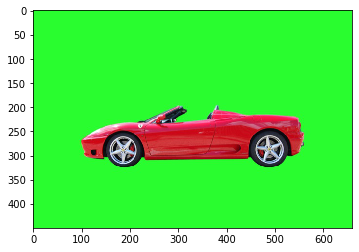

In [4]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [5]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,230,0]) 
upper_green = np.array([70,255,70])


### Create a mask

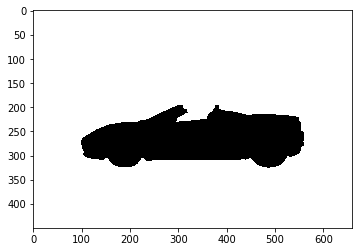

In [6]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

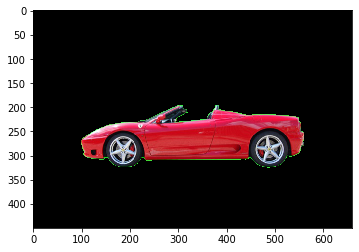

In [7]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

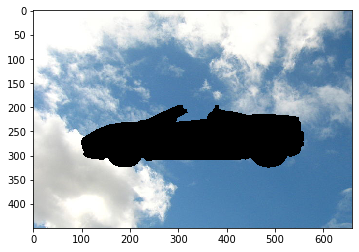

In [24]:
# Load in a background image, and convert it to RGB 
#background_image = mpimg.imread('images/sky.jpg')
from PIL import Image
background_image = np.array(Image.open('images/sky.jpg'))
crop_background = background_image.copy()

crop_background = cv2.cvtColor(crop_background, cv2.COLOR_BGR2RGB)
crop_background.setflags(write=1)
## TODO: Crop it or resize the background to be the right size (450x660)
crop_background = background_image[0:450,0:660]


## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
crop_background[mask==0] = [0,0,0]

## TODO: Display the background and make sure 
plt.imshow(crop_background)

### Create a complete image

In [26]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

complete_image = crop_background + masked_image

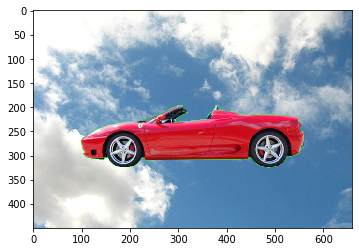

In [27]:
plt.imshow(complete_image)